In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
filename = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
df = pd.read_csv(filename)

In [3]:
df = df.drop('Time', axis=1)
df

,RtoR
0,17729
1,13114
2,253
3,3176
4,10164
...,...
2219,855
2220,3246
2221,785
2222,400


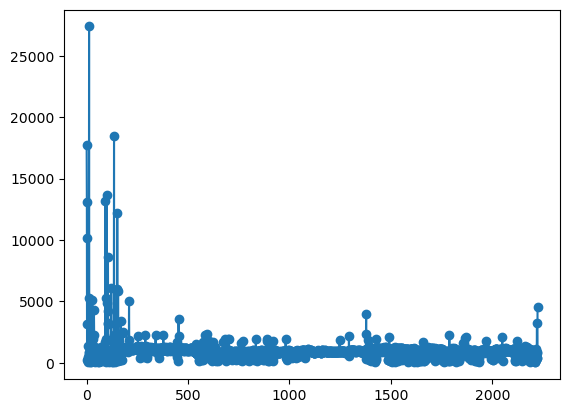

In [4]:
plt.plot(df['RtoR'], marker='o')
plt.show()

In [5]:
df = df[df['RtoR'] <= 4000]

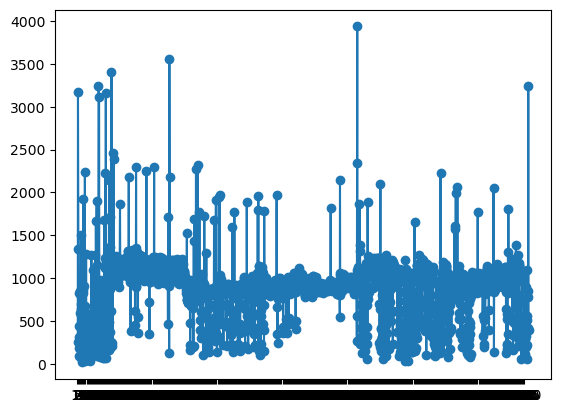

In [6]:
plt.plot(df['RtoR'], marker='o')
plt.xticks(ticks=range(0, len(df['RtoR']), 5))
plt.show()

In [7]:
import ipywidgets as widgets

In [8]:
widgets.IntSlider()

IntSlider(value=0)

In [9]:
w = widgets.IntSlider()

In [10]:
from IPython.display import display

In [11]:
display(w)

IntSlider(value=0)

In [12]:
w.value

0

In [13]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [14]:
w.step

1

In [15]:
widgets.IntSlider(step=2, description='Number:')

IntSlider(value=0, description='Number:', step=2)

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

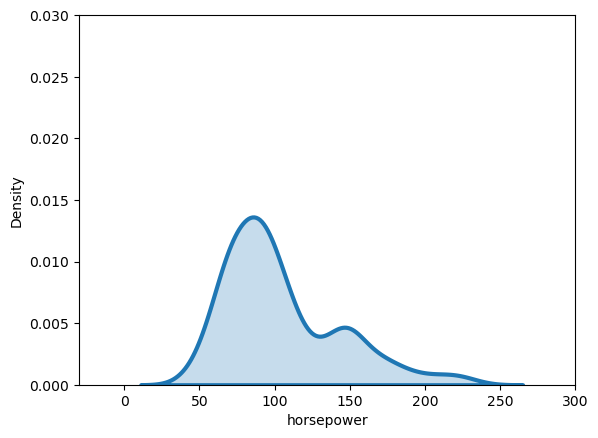

In [17]:
cars = sns.load_dataset('mpg')

sns.kdeplot(cars.horsepower, lw=3, fill=True, bw_adjust=1)
plt.xlim(-30,300)
plt.ylim(0,0.03);

In [18]:
cars = sns.load_dataset('mpg')

def bandwidth_widget(bw=1):
    sns.kdeplot(cars.horsepower, lw=3, fill=True, bw_adjust=bw)
    plt.xlim(-30,300)
    plt.ylim(0,0.03);

In [19]:
widgets.interact(bandwidth_widget, bw=(.1,3));

interactive(children=(FloatSlider(value=1.0, description='bw', max=3.0, min=0.1), Output()), _dom_classes=('wi…

In [20]:
@widgets.interact(bw=(.1, 3, .1))
def bandwidth_widget(bw=1):
    sns.kdeplot(cars.horsepower, lw=3, fill=True, bw_adjust=bw)
    plt.xlim(-30,300)
    plt.ylim(0,0.03);

interactive(children=(FloatSlider(value=1.0, description='bw', max=3.0, min=0.1), Output()), _dom_classes=('wi…

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Sample DataFrame (Replace this with your actual df)
df = pd.DataFrame({
    'RtoR': np.random.randint(60, 120, size=100)  # Sample data, replace with your df['RtoR']
})

# Define a function to update the plot based on widget values
def plot_interactive(x_range=(0, 20), y_range=(None, None)):
    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o',linestyle='')
    plt.xticks(ticks=range(0, len(df['RtoR']), 5))
    
    # Unpack x_range and y_range tuples
    xmin, xmax = x_range
    ymin, ymax = y_range
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define interactive sliders
x_slider = widgets.IntRangeSlider(
    value=[0, 20],
    min=0,
    max=len(df['RtoR']) - 1,
    step=1,
    description='X Range:',
    continuous_update=False
)

y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    x_range=x_slider,
    y_range=y_slider
)


interactive(children=(IntRangeSlider(value=(0, 20), continuous_update=False, description='X Range:', max=99), …

<function __main__.plot_interactive(x_range=(0, 20), y_range=(None, None))>

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Sample DataFrame (Replace this with your actual df)
df = pd.DataFrame({
    'RtoR': np.random.randint(60, 120, size=100)  # Sample data, replace with your df['RtoR']
})

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, xmax=20, y_range=(None, None)):
    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o')
    plt.xticks(ticks=range(0, len(df['RtoR']), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define independent sliders for xmin and xmax
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df['RtoR']) - 1,
    step=1,
    description='X Min:',
    continuous_update=False
)

xmax_slider = widgets.IntSlider(
    value=20,
    min=0,
    max=len(df['RtoR']) - 1,
    step=1,
    description='X Max:',
    continuous_update=False
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    xmax=xmax_slider,
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=99), IntSlider(val…

<function __main__.plot_interactive(xmin=0, xmax=20, y_range=(None, None))>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Sample DataFrame (Replace this with your actual df)
df = pd.DataFrame({
    'RtoR': np.random.randint(60, 120, size=100)  # Sample data, replace with your df['RtoR']
})

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, xmax=10, y_range=(None, None)):
    # Ensure the range is valid
    if xmin >= xmax:
        xmin = xmax - 1  # Keep the xmin less than xmax
    elif xmax - xmin > 10:  # Keep the range fixed at 10 points
        xmax = xmin + 10

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o')
    plt.xticks(ticks=range(0, len(df['RtoR']), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define independent sliders for xmin and xmax (with constraints to keep a fixed window)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df['RtoR']) - 11,  # Keep at least 10 points available
    step=1,
    description='X Min:',
    continuous_update=False
)

xmax_slider = widgets.IntSlider(
    value=10,
    min=0,
    max=len(df['RtoR']) - 1,
    step=1,
    description='X Max:',
    continuous_update=False
)

# Update xmax_slider based on xmin_slider (to keep the window fixed at 10 points)
def update_xmax(*args):
    xmin_val = xmin_slider.value
    xmax_slider.value = xmin_val + 10

# Link xmax_slider with xmin_slider
xmin_slider.observe(update_xmax, 'value')

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    xmax=xmax_slider,
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=89), IntSlider(val…

<function __main__.plot_interactive(xmin=0, xmax=10, y_range=(None, None))>

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded, for example:
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, y_range=(None, None)):
    xmax = xmin + 10  # Keep a fixed window of 10 points for the x-axis

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o')  # Access the 'RtoR' column here
    
    plt.xticks(ticks=range(0, len(df), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 10,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=False
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    y_range=y_slider
)



interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=90), FloatRangeSli…

<function __main__.plot_interactive(xmin=0, y_range=(None, None))>

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded, for example:
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, y_range=(None, None)):
    xmax = xmin + 10  # Keep a fixed window of 10 points for the x-axis

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o',linestyle='')  # Access the 'RtoR' column here
    
    plt.xticks(ticks=range(0, len(df), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 10,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=False
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=90), FloatRangeSli…

<function __main__.plot_interactive(xmin=0, y_range=(None, None))>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, window_size=10, y_range=(None, None)):
    xmax = xmin + window_size  # Dynamic window size based on the slider

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o',linestyle='')  # Access the 'RtoR' column here
    
    plt.xticks(ticks=range(0, len(df), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 1,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=False
)

# Define a slider for window size (how many points to show on the x-axis)
window_size_slider = widgets.IntSlider(
    value=10,  # Default window size
    min=5,  # Minimum number of points
    max=len(df),  # Maximum number of points is the length of the data
    step=1,
    description='Window Size:',
    continuous_update=False
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    window_size=window_size_slider,  # Add window size slider to adjust number of points
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=99), IntSlider(val…

<function __main__.plot_interactive(xmin=0, window_size=10, y_range=(None, None))>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, window_size=10, y_range=(None, None)):
    xmax = xmin + window_size  # Dynamic window size based on the slider

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    # Clear the figure before plotting to reset the axes
    plt.clf()

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o')  # Access the 'RtoR' column here
    
    plt.xticks(ticks=range(0, len(df), 5))
    
    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 1,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=False
)

# Define a slider for window size (how many points to show on the x-axis)
window_size_slider = widgets.IntSlider(
    value=10,  # Default window size
    min=5,  # Minimum number of points
    max=len(df),  # Maximum number of points is the length of the data
    step=1,
    description='Window Size:',
    continuous_update=False
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=False
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    window_size=window_size_slider,  # Add window size slider to adjust number of points
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, continuous_update=False, description='X Min:', max=99), IntSlider(val…

<function __main__.plot_interactive(xmin=0, window_size=10, y_range=(None, None))>

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, window_size=10, y_range=(None, None)):
    xmax = xmin + window_size  # Dynamic window size based on the slider

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    # Clear the figure before plotting to reset the axes
    plt.clf()

    plt.figure(figsize=(10, 4))
    plt.plot(df['RtoR'], marker='o')  # Access the 'RtoR' column here
    
    # Dynamically adjust x-tick spacing based on window size
    tick_spacing = max(1, window_size // 10)  # Reduce the number of ticks as the window size increases
    plt.xticks(ticks=range(xmin, xmax, tick_spacing))
    
    # Rotate the x-axis labels if they are too crowded
    plt.xticks(rotation=45)

    # Set x and y axis limits based on widget values
    plt.xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('R to R Interval')
    plt.title('Interactive RtoR Plot')
    plt.show()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 1,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=True
)

# Define a slider for window size (how many points to show on the x-axis)
window_size_slider = widgets.IntSlider(
    value=10,  # Default window size
    min=5,  # Minimum number of points
    max=len(df),  # Maximum number of points is the length of the data
    step=1,
    description='Window Size:',
    continuous_update=True
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=True
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    window_size=window_size_slider,  # Add window size slider to adjust number of points
    y_range=y_slider
)


interactive(children=(IntSlider(value=0, description='X Min:', max=99), IntSlider(value=10, description='Windo…

<function __main__.plot_interactive(xmin=0, window_size=10, y_range=(None, None))>

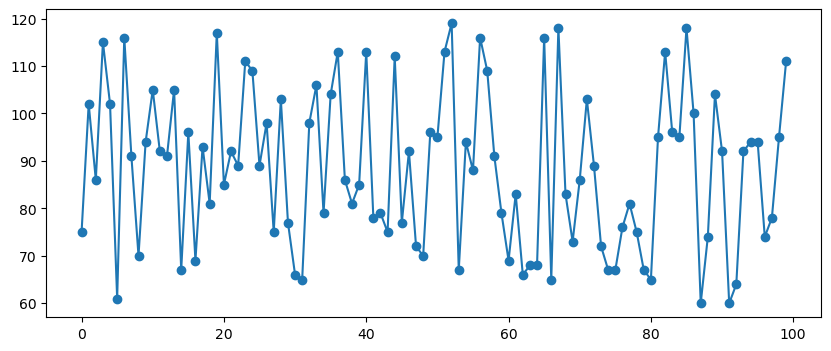

interactive(children=(IntSlider(value=0, description='X Min:', max=99), IntSlider(value=10, description='Windo…

<function __main__.plot_interactive(xmin=0, window_size=10, y_range=(None, None))>

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Assuming you already have the 'df' DataFrame loaded
# df = pd.read_csv('your_data.csv')  # or however you load your actual data

# Create the figure and axis once
fig, ax = plt.subplots(figsize=(10, 4))
line, = ax.plot(df['RtoR'], marker='o')  # Initialize the line plot

# Define a function to update the plot based on widget values
def plot_interactive(xmin=0, window_size=10, y_range=(None, None)):
    xmax = xmin + window_size  # Dynamic window size based on the slider

    # Ensure the range is valid
    if xmax > len(df):
        xmax = len(df)  # Avoid exceeding the length of the data

    # Update x and y limits
    ax.set_xlim(xmin, xmax)
    
    ymin, ymax = y_range
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)

    # Update tick spacing
    ax.set_xticks(range(xmin, xmax, max(1, window_size // 10)))
    
    # Redraw the updated plot
    fig.canvas.draw()

# Define the slider for xmin (only one slider for x)
xmin_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(df) - 1,  # Ensure that we don't exceed the data range
    step=1,
    description='X Min:',
    continuous_update=True
)

# Define a slider for window size (how many points to show on the x-axis)
window_size_slider = widgets.IntSlider(
    value=10,  # Default window size
    min=5,  # Minimum number of points
    max=len(df),  # Maximum number of points is the length of the data
    step=1,
    description='Window Size:',
    continuous_update=True
)

# Define a range slider for y
y_slider = widgets.FloatRangeSlider(
    value=[df['RtoR'].min(), df['RtoR'].max()],
    min=df['RtoR'].min(),
    max=df['RtoR'].max(),
    step=1,
    description='Y Range:',
    continuous_update=True
)

# Use interact to create the interactive plot
interact(
    plot_interactive,
    xmin=xmin_slider,
    window_size=window_size_slider,
    y_range=y_slider
)
